#### Side note for github readers: This notebook has been made to optimize the delivery of the project into a Graasp page. So please don't yell at me when you see wierd stuff e.g. multiple importation of the same library. Addictionally, I will probably continue this project when I will have some free time as i am interested to go further into the covid analysis and this tool could be a nice starting point.

# Project description
## Meta
- Author: Romain Claret
- University: Neuchatel, Switzerland
- Class: Computational Thinking
- Type: Project

## Problem
As of early 2021, information about covid became usual. Indeed, datasets and graphic visualisation became commun to find, but often doesn't explicitly show what we are looking for.
Here was are aiming at building a tool to extract information from multiple datasets with the goal of finding and showing explicitly what we are looking for, e.g., trying to find the correlations between the new Covid cases and the Vaccination campaign in Switzerland, based on the official datasets provided by the Swiss Government.

## Solution
Our approach is to provide a class for the Regions (canton) of Switzerland, containing all the information related to Covid based on a specific date. Region objects self-updates when the date is modified, all information for a specific date can be displayed as a graph or a table, and exported as a dataframe or a list.

## Datasets
- https://www.bag.admin.ch/bag/fr/home/krankheiten/ausbrueche-epidemien-pandemien/aktuelle-ausbrueche-epidemien/novel-cov/situation-schweiz-und-international.html
- https://www.bag.admin.ch/bag/fr/home/krankheiten/ausbrueche-epidemien-pandemien/aktuelle-ausbrueche-epidemien/novel-cov/impfen.html#-695394864
- https://github.com/openZH/covid_19
- https://github.com/rsalzer/COVID_19_VACC
- https://github.com/doerfli/foph-covid19-data
- https://github.com/daenuprobst/covid19-cases-switzerland
- https://github.com/covid-19-Re/dailyRe-Data

## Similar projects
The following project are all using data from the sars-cov 2 and display information but none is trying to correlate information together, and particularly in Switzerland.
- https://www.covid19.admin.ch/fr/overview
- https://www.covid19.admin.ch/fr/epidemiologic/vacc-doses
- https://ourworldindata.org/covid-vaccinations
- https://corona-data.ch/
- https://www.covid19-data.ch/vaccinations
- https://www.corona-immunitas.ch/fr/
- https://sciencetaskforce.ch/en/current-situation/

## Abstraction
As I am no expert in the medical field, I will try to gather as much information (that I think important initially) to build a dataset containing the following (preferably by day, by canton):



- number of tests done for the date and in total until this date
- number of positive tests for the date and in total until this date
- number of hospitalizations for the date and in total until this date
- number of deaths for the date and in total until this date
- number of vaccinations done for the date and in total until this date
- number of vaccinations completed (seconde dose) for the date and in total until this date
- percentage of vaccination for the date and in total until this date
- reproductive number Re for the date and in total until this date

Finally, I will be focusing on maintained (up to date) datasets:
- Will focus on auto-maintained datasets (which use scheduled scrapers)
- Will not fill holes but replace the missing information by 0

## Patterns
- dataset loading
- data extraction
- use of a graph template to display data

## Decomposition
- use of pandas' dataframes for the data manipulations
- gather the official raw datasets from sources
    - focusing on csv files ready to use (summaries)
    - make a scraper for csv files unready to use as it is
    - build a custom dataset for our project
    - standardize the cantons columns names
    - take into concideration of unmatching name for Switzerland (CH <-> CHE) 
- calculate additional data
    - use the datetime object to substract days and load information previous day information
- display values in tables
- use of different charts (and maps to highlight key information)
    - plots
    - (Switzerland map ->not implemented: geoposition libraries like geopandas, shapefile are not present in graasp)

# Gather data
- It came to conclusion that it would not be necessary to build a scraper, as multiple public projects are already gathering and building datasets.
- After some research, we could find all the features required, but no dataset was aggregating all the required features at once.
- It was then undertaken to build a custom dataset by merging the minimum amount of datasets to cumulate our required features.
- 5 datasets were selected:
  - (Vaccins) foph-covid19-data: https://github.com/doerfli/foph-covid19-data/blob/main/vacc_data.csv

| Field Name            | Description                                                                              | Format     | Example    |
|-----------------------|------------------------------------------------------------------------------------------|------------|------------|
| date                  | date                                                                                     | YYYY-MM-DD | 2021-02-27 |
| canton                | two-letter name of canton or CH for whole switzerland or CHFL for whole CH+liechtenstein | Text       | NE         |
| deliveredTotal        | sum of vaccines delivered to the canton till the date                                    | Number     | 21000      |
| deliveredPer100       | sum of vaccines delivered to the canton till the date per 100 population                 | Number     | 11.9       |
| administeredTotal     | number of vaccines vaccinated in the canton till the date                                | Number     | 15955      |
| administeredPer100    | number of vaccines vaccinated in the canton till the date per 100 population             | Number     | 9.04       |
| fullyVaccinatedTotal  | number of people who are fully vaccinated (2 doses at the moment)                        | Number     | 2572       |
| fullyVaccinatedPer100 | number of people who are fully vaccinated (2 doses at the moment) per 100 population     | Number     | 1.46       |

  - (Positive Tests) covid19-cases-switzerland: https://github.com/daenuprobst/covid19-cases-switzerland/blob/master/covid19_cases_switzerland_openzh.csv

| Field Name                              | Description                                         | Format     | Example                |
|-----------------------------------------|-----------------------------------------------------|------------|------------------------|
| Date                                    | Date of notification                                | YYYY-MM-DD | 2020-02-26             |
| Cantons Abbreviations [AG to ZH and CH] | Total of Confirmed cases until this date                                    | Value      | 11.0                   |
| Canton_diff [AG to ZH and CH]           | Current date new cases                              | Value      | 5.0                    |
| Canton_pc [AG to ZH and CH]             | Percent cases of the canton population              | Value      | 1.2878435761777038e-06 |
| Canton_diff_pc [AG to ZH and CH]        | Current date percent cases of the canton population | Value      | 5.85383443717138e-07   |

  - (Deaths) covid19-cases-switzerland: https://github.com/daenuprobst/covid19-cases-switzerland/blob/master/covid19_fatalities_switzerland_openzh.csv

| Field Name                              | Description                                         | Format     | Example                |
|-----------------------------------------|-----------------------------------------------------|------------|------------------------|
| Date                                    | Date of notification                                | YYYY-MM-DD | 2020-02-26             |
| Cantons Abbreviations [AG to ZH and CH] | Total of Deaths until this date                                     | Value      | 0.0                   |
| Canton_diff [AG to ZH and CH]           | Current date new deaths                              | Value      | 0.0                    |
| Canton_pc [AG to ZH and CH]             | Percent deaths of the canton population              | Value      | 0.0 |
| Canton_diff_pc [AG to ZH and CH]        | Current date percent deaths of the canton population | Value      | 0.0   |
  
  - (Hospitalizations) covid19-cases-switzerland: https://github.com/daenuprobst/covid19-cases-switzerland/blob/master/covid19_hospitalized_total_switzerland_openzh.csv
 
| Field Name                              | Description                                         | Format     | Example                |
|-----------------------------------------|-----------------------------------------------------|------------|------------------------|
| Date                                    | Date of notification                                | YYYY-MM-DD | 2020-02-26             |
| region [AG to ZH and CH] | Total of Hospitalizations until this date                                     | Value      | 0.0                   |
| Canton_diff [AG to ZH and CH]           | Current date new Hospitalizations                              | Value      | 0.0                    |
| Canton_pc [AG to ZH and CH]             | Percent Hospitalization of the canton population              | Value      | 0.0 |
| Canton_diff_pc [AG to ZH and CH]        | Current date percent Hospitalization of the canton population | Value      | 0.0   |

  - (Re step-wise) dailyRe-Data: https://github.com/covid-19-Re/dailyRe-Data/blob/master/CHE-confCasesSWestimates.csv
  
| Field Name       | Description                            | Format     | Example    |
|------------------|----------------------------------------|------------|------------|
| region           | Canton abbreviation [AG to ZH and CHE] | string | CHE        |
| date             | Date of notification                   | YYYY-MM-DD | 2020-02-09 |
| median_R_mean    | Median R_e                             | Value      | 1.68       |
| median_R_highHPD | High Median R_e                        | Value      | 3.32       |
| median_R_lowHPD  | Low Median R_e                         | Value      | 0.59       |


In [8]:
import pandas as pd
import csv

# no need for openssl package and takes care of badly configured virtual paths... my god..
def graasp_csv_to_dataframe(path:str):
    reader = csv.DictReader(open(path,'r'))
    file_dict = {}
    for row in reader:
        for column, value in row.items():
            file_dict.setdefault(column, []).append(value)
    return pd.DataFrame(data=file_dict)

#try:
#    df_vacc = pd.read_table("https://raw.githubusercontent.com/doerfli/foph-covid19-data/master/vacc_data.csv",sep=",")
#    df_cases = pd.read_table("https://raw.githubusercontent.com/daenuprobst/covid19-cases-switzerland/master/covid19_cases_switzerland_openzh.csv",sep=",")
#    df_deaths = pd.read_table("https://raw.githubusercontent.com/daenuprobst/covid19-cases-switzerland/master/covid19_fatalities_switzerland_openzh.csv",sep=",")
#    df_hosps = pd.read_table("https://raw.githubusercontent.com/daenuprobst/covid19-cases-switzerland/master/covid19_hospitalized_total_switzerland_openzh.csv",sep=",")
#    df_re = pd.read_table("https://raw.githubusercontent.com/covid-19-Re/dailyRe-Data/master/CHE-confCasesSWestimates.csv",sep=",")
#except:
    # Special Graasp...
df_vacc = graasp_csv_to_dataframe("./vacc_data.csv")
df_cases = graasp_csv_to_dataframe("./covid19_cases_switzerland_openzh.csv")
df_deaths = graasp_csv_to_dataframe("./covid19_fatalities_switzerland_openzh.csv")
df_hosps = graasp_csv_to_dataframe("./covid19_hospitalized_total_switzerland_openzh.csv")
df_re = graasp_csv_to_dataframe("./CHE-confCasesSWestimates.csv")
    

# (side note) Build custom dataset
This part will not be used as the project specifications require the use of classes. And this part of the project seemed to be compatible with that specification. Since I was not planning initially to use classes, this is how it would have been done using a dataframe.

- As we have multiple datasets, they will be merged into 1 custom dataset
- 6 datasets were gathered (from openZH, foph-covid19-data, and dailyRe-Data), they have 2 features in commun: the Date and the Canton. The merge will based on those 2 features.
- As the datasets are coming from different sources, the labeling are not always the same, it must be unified
  - As the name of the Canton column is not always the same, it will be unified as "region"
  - As the name of the Dates column is not always the same, it will be unified as "date"
  - The region value for Switzerland, will be unified as CH
  - Unify the usage of the region column region 
  - It will be only kept the rows present in all datasets for the 2 features.
- Some features are meaningless for our project, so we will drop them: 

| Field Name               | Description                                                                          | Format     | Example                |
|--------------------------|--------------------------------------------------------------------------------------|------------|------------------------|
| date                     | Date of notification                                                                 | YYYY-MM-DD | 2021-02-27             |
| region                   | Abbreviation of the reporting canton                                                 | Text       | NE                     |
| tested                   | Total of Tests until this date                                                       | Value      | 11.0                   |
| tested_diff              | Current date new tests                                                               | Value      | 5.0                    |
| tested_pc                | Percent tests of the canton population                                               | Value      | 1.2878435761777038e-06 |
| tested_diff_pc           | Current date percent tests of the canton population                                  | Value      | 5.85383443717138e-07   |
| cases                    | Total of Confirmed positive cases until this date                                    | Value      | 11.0                   |
| cases_diff               | Current date new cases                                                               | Value      | 5.0                    |
| cases_pc                 | Percent cases of the canton population                                               | Value      | 1.2878435761777038e-06 |
| cases_diff_pc            | Current date percent cases of the canton population                                  | Value      | 5.85383443717138e-07   |
| deaths                   | Total of Deaths until this date                                                      | Value      | 0.0                    |
| deaths_diff              | Current date new deaths                                                              | Value      | 0.0                    |
| deaths_pc                | Percent deaths of the canton population                                              | Value      | 0.0                    |
| deaths_diff_pc           | Current date percent deaths of the canton population                                 | Value      | 0.0                    |
| hospitalizations         | Total of Hospitalizations until this date                                            | Value      | 0.0                    |
| hospitalizations_diff     | Current date new Hospitalizations                                                    | Value      | 0.0                    |
| hospitalizations_pc      | Percent Hospitalization of the canton population                                     | Value      | 0.0                    |
| hospitalizations_diff_pc | Current date percent Hospitalization of the canton population                        | Value      | 0.0                    |
| median_R_mean            | Median R_e                                                                           | Value      | 1.68                   |
| median_R_highHPD         | High Median R_e                                                                      | Value      | 3.32                   |
| median_R_lowHPD          | Low Median R_e                                                                       | Value      | 0.59                   |
| deliveredTotal           | sum of vaccines delivered to the canton till the date                                | Number     | 21000                  |
| deliveredPer100          | sum of vaccines delivered to the canton till the date per 100 population             | Number     | 11.9                   |
| administeredTotal        | number of vaccines vaccinated in the canton till the date                            | Number     | 15955                  |
| administeredPer100       | number of vaccines vaccinated in the canton till the date per 100 population         | Number     | 9.04                   |
| fullyVaccinatedTotal     | number of people who are fully vaccinated (2 doses at the moment)                    | Number     | 2572                   |
| fullyVaccinatedPer100    | number of people who are fully vaccinated (2 doses at the moment) per 100 population | Number     | 1.46                   |


# Making a Class for Regions
I would not recommend this approach excepted in a pedagological context, such as this one, as it's clearly not optimized, and kinda meaningless in our project...

- Each Region object is initialized with a canton abreviation and a date
- It uses dataframes as global values
- It has only one set method, which is for the date, which will call an internal update method for all internal values
- It has a get method for all internal values
- It has a method returning the list of all internal values in a specific order
- The delivered_diff, administered_diff, fullyVaccinated_diff attributes are calculated by the class

| Region |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| +str name <br/>+str date <br/>-pandas.DataFrame df <br/>-float cases <br/>-float cases_diff <br/>-float cases_pc <br/>-float cases_diff_pc <br/>-float deaths <br/>-float deaths_diff <br/>-float deaths_pc <br/>-float deaths_diff_pc <br/>-float hospitalizations <br/>-float hospitalizations_diff <br/>-float hospitalizations_pc <br/>-float hospitalizations_diff_pc <br/>-float median_R_mean <br/>-float median_R_highHPD <br/>-float median_R_lowHPD <br/>-float delivered_diff <br/>-float deliveredTotal <br/>-float deliveredPer100 <br/>-float administered_diff <br/>-float administeredTotal <br/>-float administeredPer100 <br/>-float fullyVaccinated_diff <br/>-float fullyVaccinatedTotal <br/>-float fullyVaccinatedPer100                                                                                                             |
| -update_InternalValues(): void <br/>+get_all(): List<float\> <br/>+get_df(): pandas.DataFrame <br/>+print_data(): void <br/>+get_name(): str <br/>+get_date(): str <br/>+get_cases(): float <br/>+get_cases_diff(): float <br/>+get_cases_pc(): float <br/>+get_cases_diff_pc(): float <br/>+get_deaths(): float <br/>+get_deaths_diff(): float <br/>+get_deaths_pc(): float <br/>+get_deaths_diff_pc(): float <br/>+get_hospitalizations(): float <br/>+get_hospitalizations_diff(): float <br/>+get_hospitalizations_pc(): float <br/>+get_hospitalizations_diff_pc(): float <br/>+get_median_R_mean(): float <br/>+get_median_R_highHPD(): float <br/>+get_median_R_lowHPD(): float <br/>+get_delivered_diff(): float <br/>+get_deliveredTotal(): float <br/>+get_deliveredPer100(): float <br/>+get_administered_diff(): float <br/>+get_administeredTotal(): float <br/>+get_administeredPer100(): float <br/>+get_fullyVaccinated_diff(): float <br/>+get_fullyVaccinatedTotal(): float <br/>+get_fullyVaccinatedPer100(): float |

In [14]:
#wouldn't be nice to use a package to pretty print a table like tabulate, or having a recent version of pandas installed ?
#meanwhile some genius made it the hard way
#https://stackoverflow.com/a/62046440
#The following is highly inspired copypasta...
import pandas as pd
def tableize(df):
    if not isinstance(df, pd.DataFrame):
        print("not a dataframe")
        return
    df_columns = df.columns.tolist() 
    max_len_in_lst = lambda lst: len(sorted([str(i) for i in lst], reverse=True, key=len)[0])
    align_center = lambda st, sz: "{0}{1}{0}".format(" "*(1+(sz-len(st))//2), st)[:sz] if len(st) < sz else st
    align_right = lambda st, sz: "{0}{1} ".format(" "*(sz-len(st)-1), st) if len(st) < sz else st
    max_col_len = max_len_in_lst(df_columns)
    max_val_len_for_col = dict([(col, max_len_in_lst(df.iloc[:,idx].astype('str'))) for idx, col in enumerate(df_columns)])
    col_sizes = dict([(col, 2 + max(max_val_len_for_col.get(col, 0), max_col_len)) for col in df_columns])
    build_hline = lambda row: '+'.join(['-' * col_sizes[col] for col in row]).join(['+', '+'])
    build_data = lambda row, align: "|".join([align(str(val), col_sizes[df_columns[idx]]) for idx, val in enumerate(row)]).join(['|', '|'])
    hline = build_hline(df_columns)
    out = [hline, build_data(df_columns, align_center), hline]
    for _, row in df.iterrows():
        out.append(build_data(row.tolist(), align_right))
    out.append(hline)
    return "\n".join(out)

In [53]:
import datetime

class Region:    
    def __init__(self,name:str, date:str = "2021-02-27"):
        self.name = name
        self.date = date
        self.__df = pd.DataFrame({'date' : [date], 'canton' : [name]})
        self.__cases = 0.0
        self.__cases_diff = 0.0
        self.__cases_pc = 0.0
        self.__cases_diff_pc = 0.0
        self.__deaths = 0.0
        self.__deaths_diff = 0.0
        self.__deaths_pc = 0.0
        self.__deaths_diff_pc = 0.0
        self.__hospitalizations = 0.0
        self.__hospitalizations_diff = 0.0
        self.__hospitalizations_pc = 0.0
        self.__hospitalizations_diff_pc = 0.0
        self.__median_R_mean = 0.0
        self.__median_R_highHPD = 0.0
        self.__median_R_lowHPD = 0.0
        self.__delivered_diff = 0.0
        self.__deliveredTotal = 0.0
        self.__deliveredPer100 = 0.0
        self.__administered_diff = 0.0
        self.__administeredTotal = 0.0
        self.__administeredPer100 = 0.0
        self.__fullyVaccinated_diff = 0.0
        self.__fullyVaccinatedTotal = 0.0
        self.__fullyVaccinatedPer100 = 0.0
        
        self.__update_InternalValues()
        
    def __update_InternalValues(self):
        name_diff = self.name+"_diff"
        name_pc = self.name+"_pc"
        name_diff_pc = self.name+"_diff_pc"
        name_date_cases = df_cases.loc[df_cases["Date"] == self.date][[self.name,name_diff,name_pc,name_diff_pc]]
        name_date_deaths = df_deaths.loc[df_deaths["Date"] == self.date][[self.name,name_diff,name_pc,name_diff_pc]]
        name_date_hosps = df_hosps.loc[df_hosps["Date"] == self.date][[self.name,name_diff,name_pc,name_diff_pc]]
        name = "CHE" if self.name == "CH" else self.name
        name_date_re = df_re.loc[(df_re["region"]==name)& (df_re["date"] == self.date)]
        name_date_vacc = df_vacc.loc[(df_vacc["canton"]==self.name) & (df_vacc["date"]==self.date)]    
        last_day = (datetime.datetime.strptime(self.date, '%Y-%m-%d')-datetime.timedelta(1)).strftime("%Y-%m-%d")
        name_date_vacc_previous = df_vacc.loc[(df_vacc["canton"]==self.name) & (df_vacc["date"]==last_day)]
        
        self.__cases = float(name_date_cases[self.name].item()) if not (name_date_cases[self.name].empty or len(name_date_cases[self.name].item()) == 0) else 0.0
        self.__cases_diff = float(name_date_cases[name_diff].item()) if not (name_date_cases[name_diff].empty or len(name_date_cases[name_diff].item()) == 0) else 0.0
        self.__cases_pc = float(name_date_cases[name_pc].item()) if not (name_date_cases[name_pc].empty or len(name_date_cases[name_pc].item()) == 0) else 0.0
        self.__cases_diff_pc = float(name_date_cases[name_diff_pc].item()) if not (name_date_cases[name_diff_pc].empty or len(name_date_cases[name_diff_pc].item()) == 0) else 0.0
        self.__deaths = float(name_date_deaths[self.name].item()) if not (name_date_deaths[self.name].empty or len(name_date_deaths[self.name].item()) == 0) else 0.0
        self.__deaths_diff = float(name_date_deaths[name_diff].item()) if not (name_date_deaths[name_diff].empty or len(name_date_deaths[name_diff].item()) == 0) else 0.0
        self.__deaths_pc = float(name_date_deaths[name_pc].item()) if not (name_date_deaths[name_pc].empty or len(name_date_deaths[name_pc].item()) == 0) else 0.0
        self.__deaths_diff_pc = float(name_date_deaths[name_diff_pc].item()) if not (name_date_deaths[name_diff_pc].empty or len(name_date_deaths[name_diff_pc].item()) == 0) else 0.0
        self.__hospitalizations = float(name_date_hosps[self.name].item()) if not (name_date_hosps[self.name].empty or len(name_date_hosps[self.name].item()) == 0) else 0.0
        self.__hospitalizations_diff = float(name_date_hosps[name_diff].item()) if not (name_date_hosps[name_diff].empty or len(name_date_hosps[name_diff].item()) == 0) else 0.0
        self.__hospitalizations_pc = float(name_date_hosps[name_pc].item()) if not (name_date_hosps[name_pc].empty or len(name_date_hosps[name_pc].item()) == 0) else 0.0
        self.__hospitalizations_diff_pc = float(name_date_hosps[name_diff_pc].item()) if not (name_date_hosps[name_diff_pc].empty or len(name_date_hosps[name_diff_pc].item()) == 0) else 0.0
        #print(name_date_re["median_R_mean"].tolist())
        #print(name_date_re["median_R_mean"].item(),type(name_date_re["median_R_mean"].item()))
        self.__median_R_mean = float(name_date_re["median_R_mean"].item()) if not (name_date_re["median_R_mean"].empty or name_date_re["median_R_mean"].item() == "NA") else 0.0
        self.__median_R_highHPD = float(name_date_re["median_R_highHPD"].item()) if not (name_date_re["median_R_highHPD"].empty or name_date_re["median_R_highHPD"].item() == "NA") else 0.0
        self.__median_R_lowHPD = float(name_date_re["median_R_lowHPD"].item()) if not (name_date_re["median_R_lowHPD"].empty or name_date_re["median_R_lowHPD"].item() == "NA") else 0.0
        
        self.__deliveredTotal = float(name_date_vacc["deliveredTotal"].item()) if not name_date_vacc["deliveredTotal"].empty else 0.0
        self.__deliveredPer100 = float(name_date_vacc["deliveredPer100"].item()) if not name_date_vacc["deliveredPer100"].empty else 0.0
        self.__administeredTotal = float(name_date_vacc["administeredTotal"].item()) if not name_date_vacc["administeredTotal"].empty else 0.0
        self.__administeredPer100 = float(name_date_vacc["administeredPer100"].item()) if not name_date_vacc["administeredPer100"].empty else 0.0
        self.__fullyVaccinatedTotal = float(name_date_vacc["fullyVaccinatedTotal"].item()) if not name_date_vacc["fullyVaccinatedTotal"].empty else 0.0
        self.__fullyVaccinatedPer100 = float(name_date_vacc["fullyVaccinatedPer100"].item()) if not name_date_vacc["fullyVaccinatedPer100"].empty else 0.0
        
        if not name_date_vacc["deliveredTotal"].empty and not name_date_vacc_previous["deliveredTotal"].empty:
            self.__delivered_diff = float(name_date_vacc["deliveredTotal"].item()) - float(name_date_vacc_previous["deliveredTotal"].item())
        else: self.__delivered_diff = 0.0
        if not name_date_vacc["administeredTotal"].empty and not name_date_vacc_previous["administeredTotal"].empty:
            self.__administered_diff = float(name_date_vacc["administeredTotal"].item()) - float(name_date_vacc_previous["administeredTotal"].item())
        else: self.__administered_diff = 0.0
        if not name_date_vacc["fullyVaccinatedTotal"].empty and not name_date_vacc_previous["fullyVaccinatedTotal"].empty:
            self.__fullyVaccinated_diff = float(name_date_vacc["fullyVaccinatedTotal"].item()) - float(name_date_vacc_previous["fullyVaccinatedTotal"].item())
        else: self.__fullyVaccinated_diff = 0.0
        
        self.__df = pd.DataFrame({'date': [self.date], 'canton': [self.name],
                   'cases': [self.__cases], 'cases_diff': [self.__cases_diff], 'cases_pc': [self.__cases_pc], 'cases_diff_pc': [self.__cases_diff_pc],
                   'deaths': [self.__deaths], 'deaths_diff': [self.__deaths_diff], 'deaths_pc': [self.__deaths_pc], 'deaths_diff_pc': [self.__deaths_diff_pc],
                   'hospitalizations': [self.__hospitalizations], 'hospitalizations_diff': [self.__hospitalizations_diff], 'hospitalizations_pc': [self.__hospitalizations_pc], 'hospitalizations_diff_pc': [self.__hospitalizations_diff_pc],
                   'median_R_mean': [self.__median_R_mean], 'median_R_highHPD': [self.__median_R_highHPD], 'median_R_lowHPD': [self.__median_R_lowHPD],
                   'delivered_diff': [self.__delivered_diff], 'deliveredTotal': [self.__deliveredTotal], 'deliveredPer100': [self.__deliveredPer100], 
                   'administered_diff': [self.__administered_diff], 'administeredTotal': [self.__administeredTotal], 'administeredPer100': [self.__administeredPer100], 
                   'fullyVaccinated_diff': [self.__fullyVaccinated_diff], 'fullyVaccinatedTotal': [self.__fullyVaccinatedTotal], 'fullyVaccinatedPer100': [self.__fullyVaccinatedPer100]
                  })
        
    def set_date(self, date):
        self.date = date
        self.__update_InternalValues()
    
    def get_all(self):
        return [self.__cases, self.__cases_diff, self.__cases_pc, self.__cases_diff_pc,
                self.__deaths, self.__deaths_diff, self.__deaths_pc, self.__deaths_diff_pc,
                self.__hospitalizations, self.__hospitalizations_diff, self.__hospitalizations_pc, self.__hospitalizations_diff_pc,
                self.__median_R_mean, self.__median_R_highHPD, self.__median_R_lowHPD,
                self.__deliveredTotal, self.__deliveredPer100, self.__delivered_diff,
                self.__administeredTotal, self.__administeredPer100, self.__administered_diff,
                self.__fullyVaccinatedTotal, self.__fullyVaccinatedPer100, self.__fullyVaccinated_diff]
    
    def get_df(self):
        return self.__df
    
    def get_name(self):
        return self.name
    
    def get_cases(self):
        return self.__cases
    
    def get_cases_diff(self):
        return self.__cases_diff
    
    def get_cases_pc(self):
        return self.__cases_pc
    
    def get_cases_diff_pc(self):
        return self.__cases_diff_pc
    
    def get_deaths(self):
        return self.__deaths
    
    def get_deaths_diff(self):
        return self.__deaths_diff
    
    def get_deaths_pc(self):
        return self.__deaths_pc
    
    def get_deaths_diff_pc(self):
        return self.__deaths_diff_pc
    
    def get_hospitalizations(self):
        return self.__hospitalizations
    
    def get_hospitalizations_diff(self):
        return self.__hospitalizations_diff
    
    def get_hospitalizations_pc(self):
        return self.__hospitalizations_pc
    
    def get_hospitalizations_diff_pc(self):
        return self.__hospitalizations_diff_pc
    
    def get_median_R_mean(self):
        return self.__median_R_mean
    
    def get_median_R_highHPD(self):
        return self.__median_R_highHPD
    
    def get_median_R_lowHPD(self):
        return self.__median_R_lowHPD
    
    def get_delivered_diff(self):
        return self.__delivered_diff
    
    def get_deliveredTotal(self):
        return self.__deliveredTotal
    
    def get_deliveredPer100(self):
        return self.__deliveredPer100
    
    def get_administered_diff(self):
        return self.__administered_diff
    
    def get_administeredTotal(self):
        return self.__administeredTotal
    
    def get_administeredPer100(self):
        return self.__administeredPer100
    
    def get_fullyVaccinated_diff(self):
        return self.__fullyVaccinated_diff
    
    def get_fullyVaccinatedTotal(self):
        return self.__fullyVaccinatedTotal
    
    def get_fullyVaccinatedPer100(self):
        return self.__fullyVaccinatedPer100
    
    def print_data(self):
        print(tableize(self.__df.T.rename_axis('Attributes').reset_index().rename(columns={0: "Values"})))

Region("CH", "2021-02-27").print_data()

+--------------------------+------------------------+
|         Attributes       |          Values        |
+--------------------------+------------------------+
|                     date |             2021-02-27 |
|                   canton |                     CH |
|                    cases |               548752.0 |
|               cases_diff |                  872.0 |
|                 cases_pc |    0.06424606710133339 |
|            cases_diff_pc | 0.00010209087258426887 |
|                   deaths |                10011.0 |
|              deaths_diff |                    8.0 |
|                deaths_pc |  0.0011720547310104538 |
|           deaths_diff_pc |  9.366135099474209e-07 |
|         hospitalizations |                  936.0 |
|    hospitalizations_diff |                    1.0 |
|      hospitalizations_pc | 0.00010958378066384825 |
| hospitalizations_diff_pc | 1.1707668874342761e-07 |
|            median_R_mean |                   1.08 |
|         median_R_highHPD |

# Show data
We now have a tool to aggregate covid information per day, we would like to use it to show somehow.

- Use the region class as a fetching tool to build a dataset for a time span
- Display the data 

In [54]:
import pandas as pd
import datetime

def build_dataset_region(region_class: Region, start:str, end:str):
    startdate = datetime.datetime.strptime(start, '%Y-%m-%d')
    enddate = datetime.datetime.strptime(end, '%Y-%m-%d')
    if startdate > enddate:
        tmp = enddate
        enddate = startdate
        startdate = tmp
    
    region_class.set_date(startdate.strftime("%Y-%m-%d"))
    df = region_class.get_df()
    
    for d in pd.date_range(startdate+datetime.timedelta(days=1),enddate,freq='d'):
        region_class.set_date(pd.to_datetime(d).date().strftime("%Y-%m-%d"))
        df = df.append(region_class.get_df())

    return df.reset_index(drop=True)

def build_dataset(region_list:list, start:str, end:str):
    for r in region_list:
        if not 'df' in locals(): df = build_dataset_region(Region(r),start,end)
        else: df = df.append(build_dataset_region(Region(r),start,end))
    return df.reset_index(drop=True)

#build_dataset_region(Region("CH"),"2021-02-10","2021-02-27")
build_dataset(["CH","NE"],"2020-11-01","2021-03-13").head()

,date,canton,cases,cases_diff,cases_pc,cases_diff_pc,deaths,deaths_diff,deaths_pc,deaths_diff_pc,...,median_R_lowHPD,delivered_diff,deliveredTotal,deliveredPer100,administered_diff,administeredTotal,administeredPer100,fullyVaccinated_diff,fullyVaccinatedTotal,fullyVaccinatedPer100
0,2020-11-01,CH,171670.0,4995.0,0.020099,0.000585,2442.0,53.0,0.000286,0.000006,...,0.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-11-02,CH,179337.0,7667.0,0.020996,0.000898,2508.0,66.0,0.000294,0.000008,...,0.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-11-03,CH,187499.0,8162.0,0.021952,0.000956,2584.0,76.0,0.000303,0.000009,...,0.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-11-04,CH,196721.0,9222.0,0.023031,0.001080,2670.0,86.0,0.000313,0.000010,...,0.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-11-05,CH,205805.0,9084.0,0.024095,0.001064,2747.0,77.0,0.000322,0.000009,...,0.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


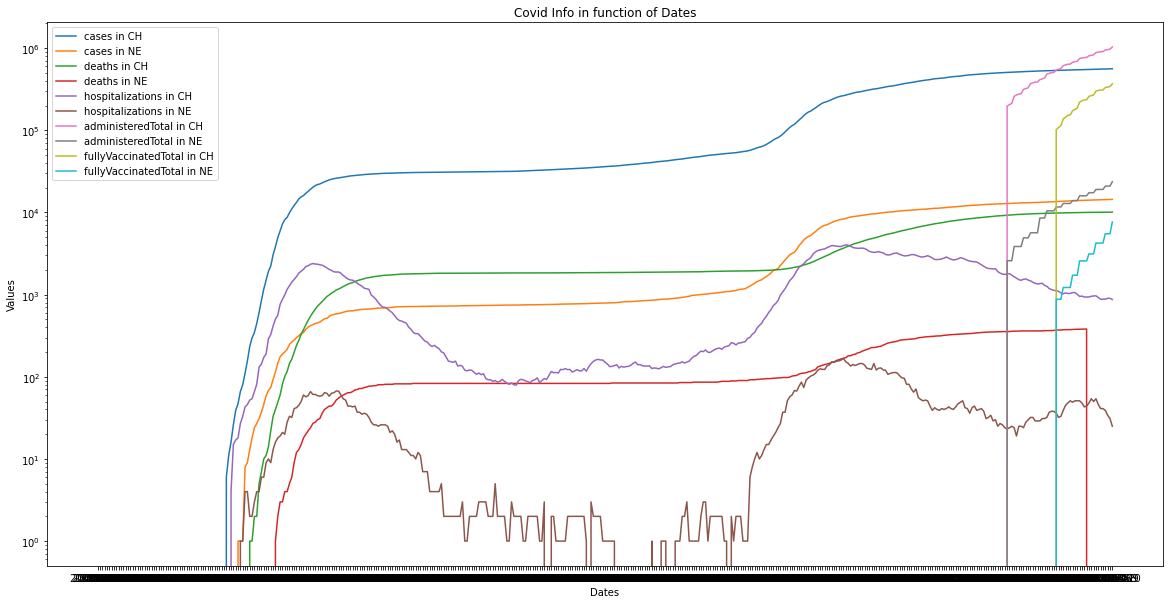

In [69]:
import matplotlib.pyplot as plt

def plot_data(df: pd.DataFrame, column: list, log: bool = True):
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1, 1, 1)
    
    for l in column:
        for c in df.canton.unique():
            canton_df = df.loc[df['canton'] == c]
            x = canton_df.date.values
            y = canton_df[l].values 
            ax.plot(x, y, label=(l + " in "+c))
    
    if log: ax.set_yscale('log')
    plt.title("Covid Info" + " in function of Dates")
    plt.legend(loc="upper left")
    plt.xlabel("Dates")
    plt.ylabel("Values")
    plt.savefig("figure.png")
    plt.show()
    plt.close()

#plot_data(build_dataset(["CH","NE"],"2020-11-01","2021-03-13"), ["cases","deaths"])
plot_data(build_dataset(["CH","NE"],"2020-01-01","2021-03-10"), ["cases","deaths","hospitalizations","administeredTotal","fullyVaccinatedTotal"])